# Data Science EDA Practice (Chapter 1)

In [36]:
# Imports
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
from scipy.stats import trim_mean, norm
from statsmodels import robust
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import resample
from scipy import stats

# Import the data set
df = pd.read_csv("C:/Users/keele/Downloads/archive/StudentsPerformance.csv")

# Output the first 5 entries to validate
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
# Look further at the data
print(df.describe())

       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000


### Types of Data per Feature

- gender: categorical (binary)
- race/ethnicity: categorical
- parental level of education: categorical
- lunch: categorical
- test preparation course: categorical (binary)
- math score: numerical (continuous)
- reading score: numerical (continuous)
- writing score: numerical (continuous)

In [4]:
# Find the location (central tendency) of the numerical data

print(f"The mean of the math score feature is {df['math score'].mean()}")                                   # Mean
print(f"The trimmed mean (10% each side) of the math score feature is {trim_mean(df['math score'], 0.1)}")  # Trimmed Mean
print(f"The median of the math score feature is {df['math score'].median()}")                               # Median
print("------------------------------------------------------------------------")
print(f"The mean of the reading score feature is {df['reading score'].mean()}")                                   # Mean
print(f"The trimmed mean (10% each side) of the reading score feature is {trim_mean(df['reading score'], 0.1)}")  # Trimmed Mean
print(f"The median of the reading score feature is {df['reading score'].median()}")                               # Median
print("------------------------------------------------------------------------")
print(f"The mean of the writing score feature is {df['writing score'].mean()}")                                   # Mean
print(f"The trimmed mean (10% each side) of the writing score feature is {trim_mean(df['writing score'], 0.1)}")  # Trimmed Mean
print(f"The median of the writing score feature is {df['writing score'].median()}")                               # Median

The mean of the math score feature is 66.089
The trimmed mean (10% each side) of the math score feature is 66.3775
The median of the math score feature is 66.0
------------------------------------------------------------------------
The mean of the reading score feature is 69.169
The trimmed mean (10% each side) of the reading score feature is 69.50125
The median of the reading score feature is 70.0
------------------------------------------------------------------------
The mean of the writing score feature is 68.054
The trimmed mean (10% each side) of the writing score feature is 68.4075
The median of the writing score feature is 69.0


The mean, trimmed mean, and median are all similar across the nuerical features. I will use the math score mostly from here.

In [5]:
"""
Print the standard deviation, the interquartile range (IQR), 
and the median absolute deviation from the median (MAD) to 
compute estimates of variability from the math score data
"""

print(f"The standard deviation is {df['math score'].std()}")
print(f"The IQR is {df['math score'].quantile(0.75) - df['math score'].quantile(0.25)}")
print(f"The MAD is {robust.scale.mad(df['math score'])}")

The standard deviation is 15.16308009600945
The IQR is 20.0
The MAD is 14.82602218505602


The standard deviation is about the same as the MAD, meaning that the dataset does not seem to have massive outliers

In [6]:
# Output the quantiles for the math score
df['math score'].quantile([0.05, 0.25, 0.5, 0.75, 0.95])

0.05    40.95
0.25    57.00
0.50    66.00
0.75    77.00
0.95    90.05
Name: math score, dtype: float64

The median score is 66, and the 5th percentile is about 41 and the 95th percentile is about 90. I will now start the graphs/plots.

Text(0, 0.5, 'Math Scores')

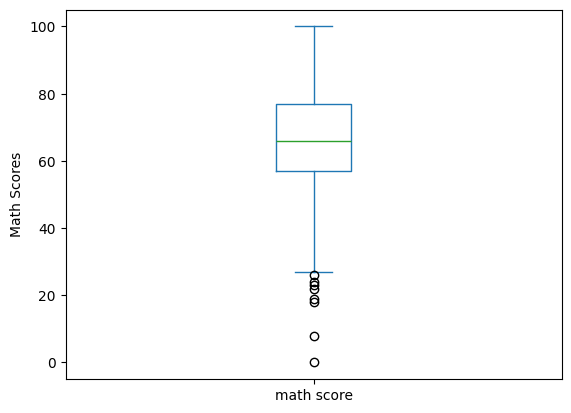

In [7]:
# Boxplot of math scores
boxplot = (df['math score']).plot.box()
boxplot.set_ylabel('Math Scores')

- From this boxplot, we can see that the median (green line) is about 66.
- Half of the scores fall between about 57 and 77, and there are some low score outliers.
- The top of the box is the 75th percentile, and the bottom of the box is the 25th percentile.

In [8]:
# Make a Frequency Table
binnedMathScores = pd.cut(df['math score'], 10)
binnedMathScores.value_counts()

math score
(60.0, 70.0]     270
(70.0, 80.0]     215
(50.0, 60.0]     189
(80.0, 90.0]     126
(40.0, 50.0]     100
(90.0, 100.0]     50
(30.0, 40.0]      34
(20.0, 30.0]      12
(10.0, 20.0]       2
(-0.1, 10.0]       2
Name: count, dtype: int64

- The score ranges with the least number of scores are the ranges of 0-10 and 10-20 with 2 scores in each
- The score range with the highest number of scores is the range of 60-70 with 270 scores

Text(0.5, 0, 'Math scores')

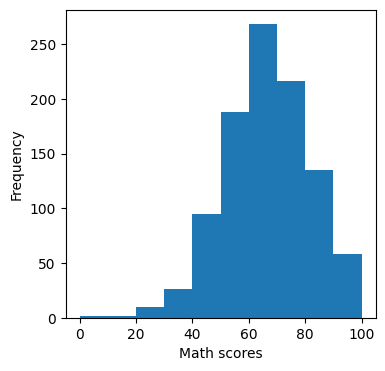

In [9]:
# Plot a histogram to visualize the frequency table
histogram = (df['math score']).plot.hist(figsize=(4,4))
histogram.set_xlabel('Math scores')

Text(0.5, 0, 'Math Scores')

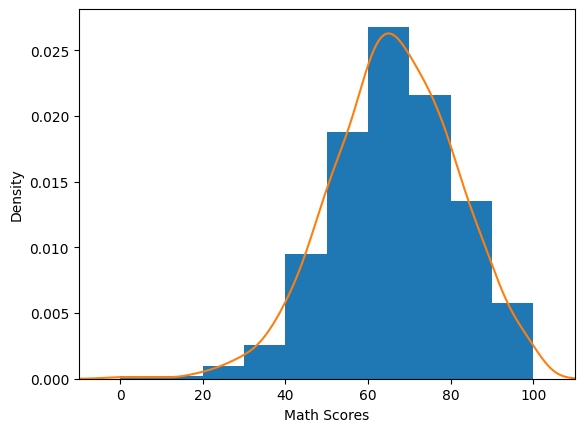

In [10]:
# Plot a density plot to give a smoother visualization of the frequency curves of scores
densityPlot = df['math score'].plot.hist(density=True, xlim=(-10, 110))
df['math score'].plot.density(ax=densityPlot)
densityPlot.set_xlabel('Math Scores')

In [11]:
# Make an education type dataframe
education_df = df['parental level of education'].value_counts().to_frame().T
education_df.columns.name = None      # remove “parental level of education” header
education_df.index = ['']             # hide left index label
education_df

,some college,associate's degree,high school,some high school,bachelor's degree,master's degree
,226,222,196,179,118,59


Text(0, 0.5, 'Count')

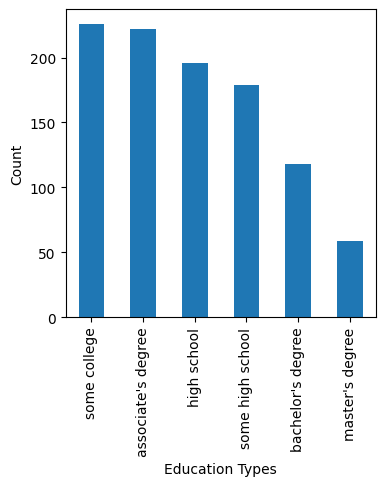

In [12]:
# Make a bar chart of the parental education types
barchart = education_df.T.plot.bar(figsize=(4,4), legend=False)
barchart.set_xlabel('Education Types')
barchart.set_ylabel('Count')

- Some college has the most people with associate's degree right behind it, and master's degree has the least amount of people.
- The mode of Education Types is "some college"

In [13]:
total_students = df['parental level of education'].value_counts().sum()
total_sc = df['parental level of education'].value_counts()['some college']
total_ad = df['parental level of education'].value_counts()["associate's degree"]
total_hs = df['parental level of education'].value_counts()['high school']
total_shs = df['parental level of education'].value_counts()['some high school']
total_bd = df['parental level of education'].value_counts()["bachelor's degree"]
total_md = df['parental level of education'].value_counts()["master's degree"]

print(f"The probability of someone's parent going to college is {((total_md+total_bd+total_ad+total_sc)/total_students)*100}%")

The probability of someone's parent going to college is 62.5%


In [14]:
# Correlation matrix between math, reading, and writing scores
correlation_matrix = df[['math score', 'reading score', 'writing score']].corr()
correlation_matrix


,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


<Axes: >

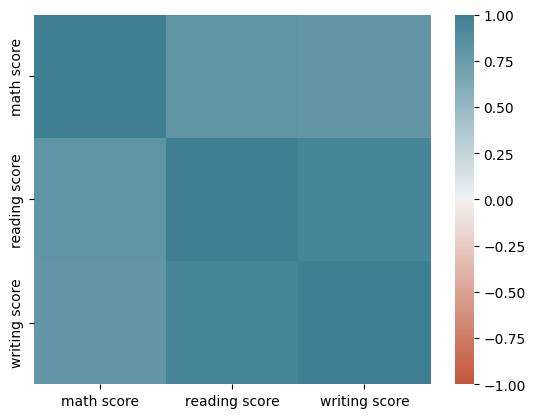

In [15]:
# Correlation graph of the above table
sns.heatmap(correlation_matrix, vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True))

- There is a high positive correlation between the math, reading, and writing scores (minimum is abiout 0.82)
- There is a VERY high correlation between the reading and writing scores (about 0.95)
- This shows that if a student does well in one area, they will likely do well in the other 2 areas, and vice versa. If they do well in reading, there is a VERY high likelihood they will do well in writing and vice versa.

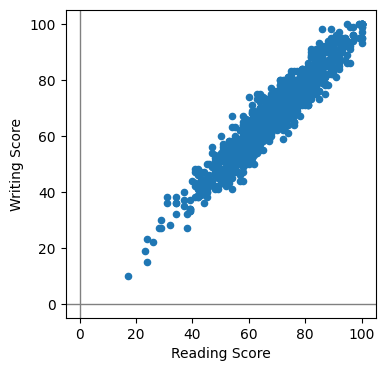

In [16]:
scatterplot = df.plot.scatter(x='reading score', y='writing score', figsize=(4,4))
scatterplot.set_xlabel('Reading Score')
scatterplot.set_ylabel('Writing Score')
scatterplot.axhline(0, color='grey', lw=1)
scatterplot.axvline(0, color='grey', lw=1)

The scatterplot visualizes the positive correlation between the reading and writing scores of students. Is is a very positive correlation as it is a relatively thin scatterplot from bottom left to top right.

Text(0, 0.5, 'Writing Score')

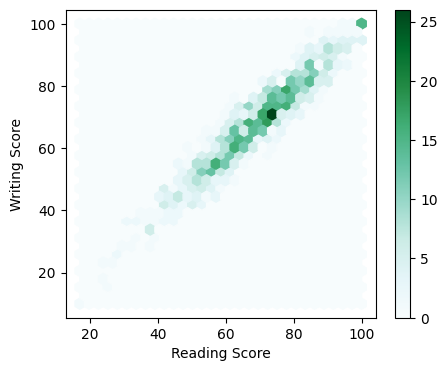

In [17]:
# Since a lot of points are overlapping, do hexagonal binning
hexagonal_binning = df.plot.hexbin(x="reading score", y='writing score', gridsize=30, sharex=False, figsize=(5,4))
hexagonal_binning.set_xlabel("Reading Score")
hexagonal_binning.set_ylabel("Writing Score")

The highest concentration of data points is around where the reading score is about 73 and the writing score is about 70

Text(0, 0.5, 'Writing Score')

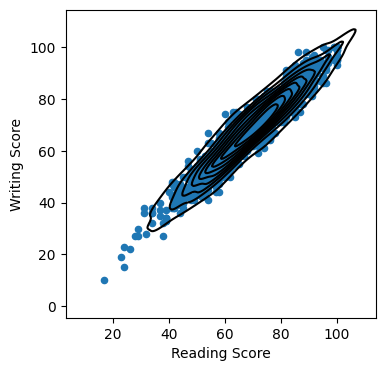

In [18]:
# Use a contour plot for more visualization of data point density
scatterplot_base = df.plot.scatter(x='reading score', y='writing score', figsize=(4,4))
contour_plot = sns.kdeplot(x=df['reading score'], y=df['writing score'], ax=scatterplot_base, color='black')
contour_plot.set_xlabel("Reading Score")
contour_plot.set_ylabel("Writing Score")

In [19]:
# Create a contingency table between race/ethnicity and test preparation course
contingency_table = pd.crosstab(df['race/ethnicity'], df['test preparation course'])
contingency_table

test preparation course,completed,none
race/ethnicity,,
group A,31,58
group B,68,122
group C,117,202
group D,82,180
group E,60,80


Text(0, 0.5, 'Math Scores')

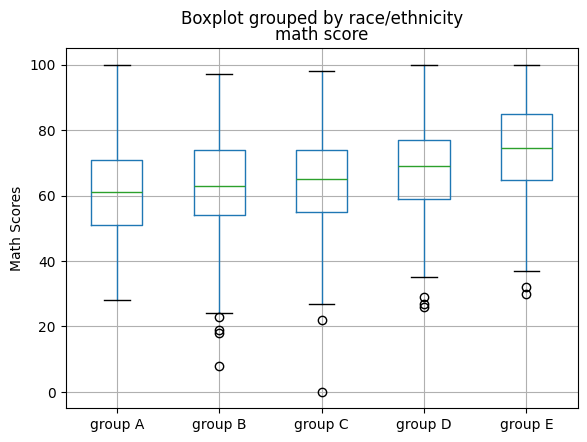

In [20]:
# Multi-boxplot between race/ethnicity and math scores

multi_boxplot = df.boxplot(by='race/ethnicity', column='math score')
multi_boxplot.set_xlabel('')
multi_boxplot.set_ylabel('Math Scores')

- Group A had the lowest median score
- Group E had the highest median score
- Group C has the biggest low score outlier

Text(0, 0.5, 'Math Scores')

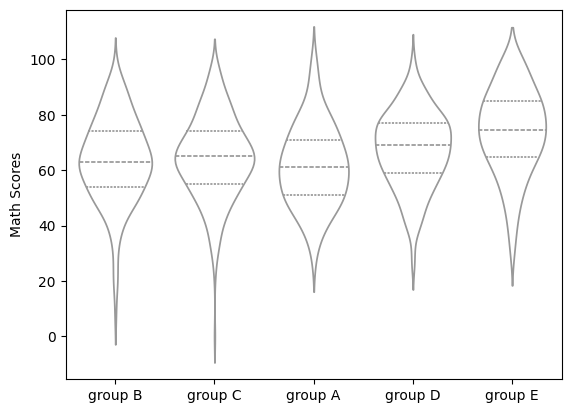

In [21]:
# Make a violin plot
violin = sns.violinplot(data=df, x='race/ethnicity', y='math score', inner='quartile', color='white')
violin.set_xlabel('')
violin.set_ylabel('Math Scores')

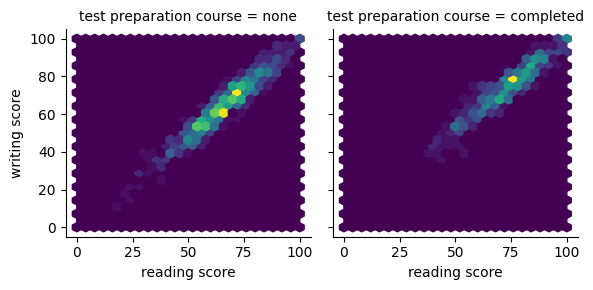

In [22]:
# Visualize multiple variables with conditioning (test preparation course and reading/writing score)

def hexbin(x, y, color, **kwargs):
    plt.hexbin(x, y, gridsize=25, extent=[0,100,0,100])

g = sns.FacetGrid(df, col='test preparation course')
g.map(hexbin, 'reading score', 'writing score')

There were less test preparation courses completed, but the grades were better on everage

------------------------------------------------------------------------------------------------------------------------------------------------------

<Axes: ylabel='Frequency'>

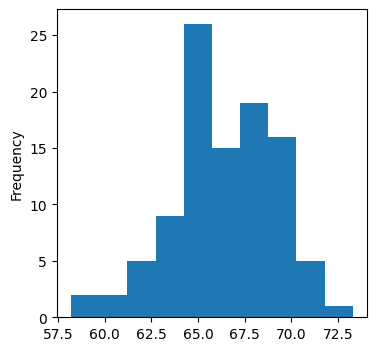

In [23]:
# Randomly sample 100 samples (n=30) from math score, compute the mean for each sample, and plot the histogram

# empty list to store the means
results = []

# loop 100 times, get random sample of n=30, append mean of sample to results list
for i in range(100):
    sample = df['math score'].sample(30)
    results.append(sample.mean())

# change list to series (for plotting), and plot the histogram
results = pd.Series(results)
mean_histogram = results.plot.hist(figsize=(4,4))
mean_histogram

Text(0.5, 0, 'Math Score Means')

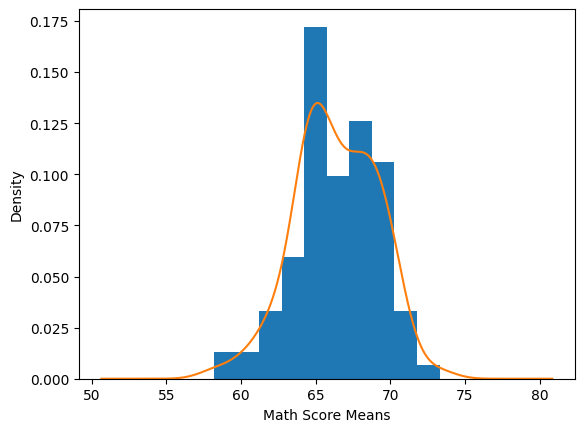

In [24]:
# Show the Central Limit Theorem (CLT)

# plot a density plot to give a smoother visualization of the frequency curves of scores
densityPlot_means = results.plot.hist(density=True)
results.plot.density(ax=densityPlot_means)
densityPlot_means.set_xlabel('Math Score Means')

Bootstrap Statistics:
original: 66.089
bias: -0.008755999999991104
Standard Error: 0.47453930924636806


<Axes: ylabel='Frequency'>

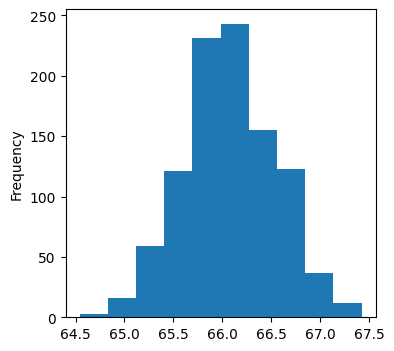

In [25]:
# Bootstrap math scores (1000 times), calculate the mean for each sample, plot (use sklearn.utils.resample)

bs_results = []
for x in range(1000):
    bs_sample = resample(df['math score'])
    bs_results.append(bs_sample.mean())

bs_results = pd.Series(bs_results)
print("Bootstrap Statistics:")
print(f"original: {df['math score'].mean()}")
print(f"bias: {bs_results.mean() - df['math score'].mean()}")
print(f'Standard Error: {bs_results.std()}')

bs_mean_histogram = bs_results.plot.hist(figsize=(4,4))
bs_mean_histogram

In [26]:
# Give a bootstrap confidence interval

lower = bs_results.quantile(0.025)
upper = bs_results.quantile(0.975)

print(lower, upper)

65.162875 67.02002499999999


In [27]:
# get Standard Deviation of the bootstrapped distribution
bs_results.std()

np.float64(0.47453930924636806)

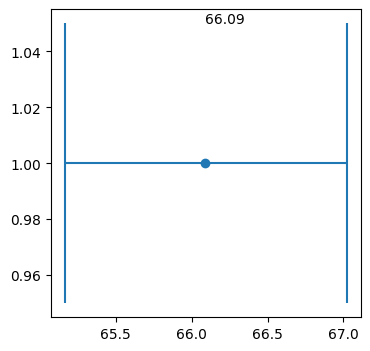

In [28]:
# Plot the confidence interval

math_score_mean = df['math score'].mean()

plt.figure(figsize=(4,4))
plt.hlines(1, lower, upper) # lower and upper are the previously calculated lower and upper quantiles (the confidence interval)
plt.vlines([lower, upper], 0.95, 1.05)
plt.plot(math_score_mean, 1, 'o')
plt.text(math_score_mean, 1.05, f"{math_score_mean:.2f}")
plt.show()

Text(0, 0.5, 'Frequency')

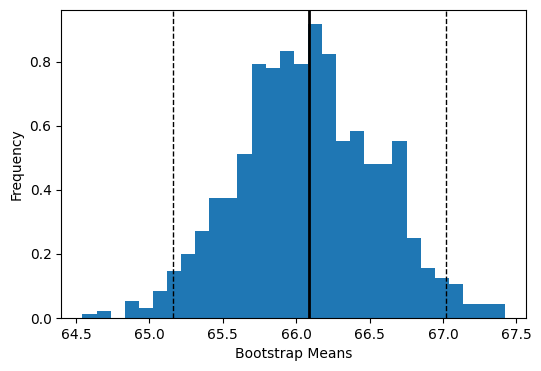

In [29]:
# Overlay on the bootstrap distribution

ax = bs_results.plot.hist(bins=30, density=True, figsize=(6,4))

ax.axvline(lower, color='black', linestyle='--', linewidth=1)
ax.axvline(upper, color='black', linestyle='--', linewidth=1)
ax.axvline(df['math score'].mean(), color='black', linewidth=2)

ax.set_xlabel('Bootstrap Means')
ax.set_ylabel('Frequency')

### This shows that if we repeatedly sample students like this, the true population mean math score would fall between 65.15 and 67.06 95% of the time.
This basically means that there is a 95% chance that the true mean likely lies between a score of 65-67

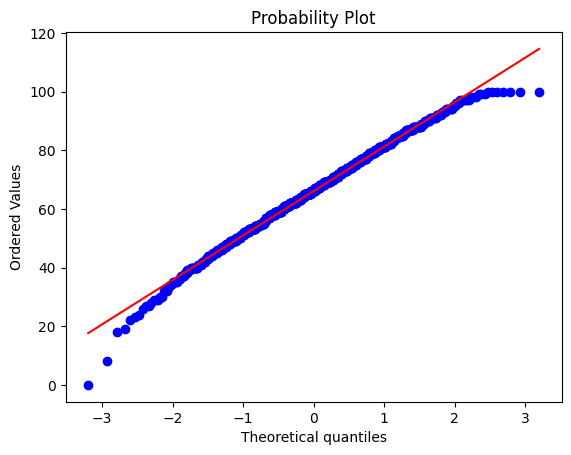

In [30]:
# QQ Plot for Normal Distribution

stats.probplot(df['math score'], dist="norm", plot=plt)
plt.show()

The math scores follow a roughly normal distribution with slight tail deviations.

In [38]:
# Implement simple linear regression with the reading and writing scores (reading=X, writing=y)

reading_scores = df[['reading score']]  # scikit learn wants a 2D DataFrame for X
writing_scores = df['writing score']  # scikit learn wasnt a 1D array for y

model = LinearRegression()
model.fit(reading_scores, writing_scores)

yhat = model.predict(reading_scores)

print(f"Intercept: {model.intercept_}")
print(f"Slope: {model.coef_[0]}")
print(f"R2: {model.score(reading_scores, writing_scores)}")

Intercept: -0.667553640932951
Slope: 0.9935311142409599
R2: 0.9112574888913137


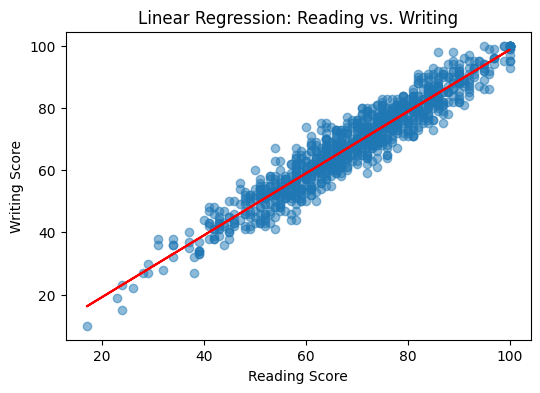

In [39]:
# Plot

plt.figure(figsize=(6,4))
plt.scatter(reading_scores, writing_scores, alpha=0.5)
plt.plot(reading_scores, yhat, color='red')
plt.xlabel("Reading Score")
plt.ylabel("Writing Score")
plt.title("Linear Regression: Reading vs. Writing")
plt.show()

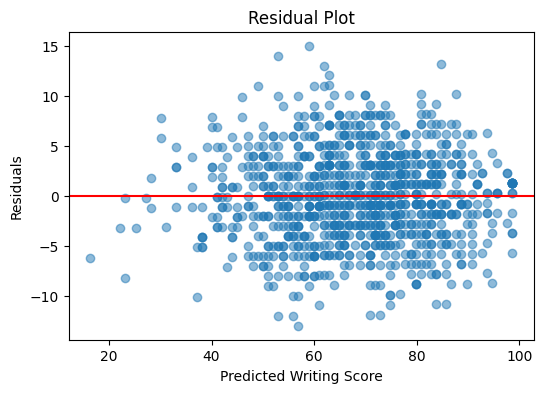

In [40]:
# Plot Residuals

residuals = writing_scores - yhat
plt.figure(figsize=(6,4))
plt.scatter(yhat, residuals, alpha=0.5)
plt.axhline(0, color='red')
plt.xlabel("Predicted Writing Score")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

- Intercept has not actual meaningful value for the data
- Slope: For every 1 point increase in the reading score, the writing score increases 0.99 points (almost 1:1)
- R2: 91.1% of the variation in writing scores is explained by the reading scores

The relationship is almost perfectly linear.

- Residual Plot: The residuals are centered around 0, which means the model does not systematically over or under-predict
- No clear patters, which suggests the linear regression model fits well